# ANÁLISIS DE LA MIGRACIÓN Y RENOVACIÓN DEL PARQUE AUTOMOTOR EN MEDELLÍN Y EL ÁREA METROPOLITANA Y SUS EFECTOS EN LA CALIDAD DEL AIRE EN ARAS DE LA TRANSICIÓN ENERGÉTICA

## Tabla de contenido


1. [Planteamiento del Problema](#1-Planteamiento_del_Problema)
2. [Variables del Dataset](#2-Variables-del-Dataset)
3. [Importar librerias](#3)
4. [Importar datos](#4)
5. [Análisis Exploratorio de Datos](#5)
6. [Definir Datos de Entrenamiento y Prueba](#6)
7. [Transformación de Datos](#7)
  * [Transformar Set de Entrenamiento](#*)
  * [Transformar Set de Prueba](#*)
8. [Entrenamiento de Modelos](#8)
  * [Modelo XGBClassifier](#*)
  * [Modelo RandomForestClassifier](#*)
  * [Modelo SVC](#*)
  * [Modelo KNN](#*)
9. [Metricas de Evaluación de Modelos](#9)
10. [Evaluación de Modelos con Validación Cruzada](#10)
  * [Evaluación Cruzada Modelo XGBClassifier](#*)
  * [Evaluación Cruzada Modelo RandomForestClassifier](#*)
  * [Evaluación Cruzada Modelo SVC](#*)
  * [Evaluación Cruzada Modelo KNN](#*)
11. [Metricas de Evaluación de Modelos con Validación Cruzada](#11)
12. [Predicciones con Mejor Modelo](#12)
13. [Conclusiones](#13)
14. [Bibliografía](#14)

#1. Planteamiento del Problema

El acelerado crecimiento del parque automotor en Medellín y el Área Metropolitana ha generado un aumento significativo en la emisión de gases contaminantes, contribuyendo a la degradación de la calidad del aire y afectando la salud pública. La dependencia del transporte basado en combustibles fósiles, como la gasolina y el diésel, ha exacerbado este problema, lo que ha llevado a un aumento de las emisiones de gases de efecto invernadero (GEI), principalmente dióxido de carbono (CO₂), y otras sustancias contaminantes como el material particulado (PM10 y PM2.5).

En este contexto, el país y la región han identificado la transición energética como una solución viable para reducir el impacto ambiental del transporte. La renovación del parque automotor, es decir, la sustitución de vehículos antiguos y contaminantes por aquellos con tecnologías más limpias (eléctricos, híbridos, y de bajas emisiones), se presenta como una estrategia fundamental en la lucha contra la contaminación del aire.

El problema radica en analizar cómo esta renovación del parque automotor en Medellín y el Área Metropolitana puede impactar la calidad del aire y cómo dicha transición hacia tecnologías más limpias se alinea con los objetivos de la transición energética. Además, es importante determinar qué tan efectiva puede ser la integración de vehículos eléctricos como alternativas de transporte sostenible.

# 2. Variables del Dataset

 1.   Clase_Vehiculo = Especifica el tipo de vehículo, ya sea camioneta, moto, camión u otro.
 2.   Tipo_Combustible = El tipo de alimentación del vehiculo, ya sea Gasolina, Eléctrico u otro.
 3.   Año_Modelo = Especifica el año del modelo del vehículo.
 4.   Cantidad_Vehiculos = Cantidad de vehículos registrados para ese año de ese tipo.
 5.   PM2.5 (µg/m³) = Registro de contaminantes particulado PM2.5.
 6.   CO (ppm) = Registro de niveles de CO en el aire.
 7.   O3 (ppm) = Registro de niveles de O3 en el aire.
 8.   NO2 (ppm) = Registro de niveles de NO2 en el aire.
 9.   Fecha_Medición = fecha en que se realizó el registro del nivel ambiental.
 10.  Tipo_Transporte = Si es de servicio privado, público u otros.
 11.  Velocidad_Promedio (km/h) = La velociad promedio de cada vehículo.
 12.  Kilometraje_Anual (km) = Estimación del kilometraje anual de cada vehículo.
 13.  Condiciones_Vehículo = Si se encuentra en buen estado o en otro estado.
 14.  Emisiones_CO2 (g/km) = Registro de niveles de CO2 en el aire.
 15.  Temperatura (°C) = Registro de la temperatura.
 16.  Humedad_Relativa (%) = Registro de la humedad relativa en porcentaje.
 17.  Precipitación (mm) = Cantidad de predcipitación en milimetros.
 18.  Zona_Urbana = Si el vehículo pertenece a la zona urbana o no.
 19.  NOX (ppm) = Registro de niveles de NOX en el aire.
 20.  SO2 (ppm) = Registro de niveles de SO2 en el aire.
 21.  ICA = Niveles de ICA para la calidad del aire.
 22.  Área (km²) = Área en la cual se toman las medidas.
 23.  Población_Municipio = Cantidad de habitantes para cada municipio.
 24.  Densidad_Vehicular (veh/km²) = Número de vehículos por kilometro cuadrado.
 25.  Industria = Densidad de la insustria en las zonas de medición.
 26.  Calidad_Aire = Estado de la calidad del aire en las zonas medidas.
 27. Municipio = Municipio en el cual se realizan los registros.

# 3. Importar Librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings

# Desactivar las alertas
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

# 4. Importar Datos

In [4]:
# Importar las datasets
df_datos = pd.read_csv(r'C:\Users\Esteban\Documents\GitHub\parque-automotor-Med\Datasets\parque_automotor_proyecto.csv', sep=',')

In [5]:
# Visualizar DataFrame df_datos
df_datos.head()

,Municipio,Clase_Vehiculo,Tipo_Combustible,Año_Modelo,Cantidad_Vehiculos,PM2.5 (µg/m³),CO (ppm),O3 (ppm),NO2 (ppm),Fecha_Medición,Tipo_Transporte,Velocidad_Promedio (km/h),Kilometraje_Anual (km),Condiciones_Vehículo,Emisiones_CO2 (g/km),Temperatura (°C),Humedad_Relativa (%),Precipitación (mm),Zona_Urbana,NOX (ppm),SO2 (ppm),ICA,Área (km²),Población_Municipio,Densidad_Vehicular (veh/km²),Industria,Calidad_Aire
0,Envigado,Autobús,Diésel,2010,37197,44.32,0.85,0.11,24.72,2024-10-01,Transporte Público,15.48,24896,Malo,224.16,15.49,41.72,2.17,Sí,0.06,0.01,157,21.90,2171224,195.53,Baja,Insalubre
1,Itagüí,Camión,Gas Natural,2014,11662,40.81,2.21,0.13,40.67,2024-10-23,Transporte Público,47.20,6980,Excelente,176.76,26.98,87.12,7.68,Sí,0.06,0.02,261,57.47,2015203,671.45,Alta,Muy Insalubre
2,Itagüí,Camión,Gasolina,2008,16041,46.54,0.96,0.06,48.87,2024-10-21,Particular,14.13,25838,Malo,48.76,29.80,40.12,13.71,Sí,0.05,0.02,39,130.45,61889,718.21,Alta,Buena
3,La Estrella,Autobús,Gasolina,2023,38762,34.09,1.59,0.13,50.59,2024-10-09,Carga,45.46,17203,Excelente,209.03,21.38,81.85,9.16,No,0.04,0.04,252,86.46,1005182,278.18,Media,Muy Insalubre
4,La Estrella,Automóvil,Diésel,2014,17402,59.47,0.11,0.08,48.02,2024-10-09,Carga,32.49,16390,Excelente,275.51,20.99,74.87,14.77,Sí,0.09,0.02,278,240.56,1321729,340.25,Alta,Muy Insalubre


# 5. Análisis Exploratorio de Datos

In [6]:
# Visualizar info del DataFrame df_datos
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Municipio                     300000 non-null  object 
 1   Clase_Vehiculo                300000 non-null  object 
 2   Tipo_Combustible              300000 non-null  object 
 3   Año_Modelo                    300000 non-null  int64  
 4   Cantidad_Vehiculos            300000 non-null  int64  
 5   PM2.5 (µg/m³)                 300000 non-null  float64
 6   CO (ppm)                      300000 non-null  float64
 7   O3 (ppm)                      300000 non-null  float64
 8   NO2 (ppm)                     300000 non-null  float64
 9   Fecha_Medición                300000 non-null  object 
 10  Tipo_Transporte               300000 non-null  object 
 11  Velocidad_Promedio (km/h)     300000 non-null  float64
 12  Kilometraje_Anual (km)        300000 non-nul

In [7]:
for column in df_datos.select_dtypes(include=['int64']).columns:
  df_datos[column] = df_datos[column].astype('int32')

for column in df_datos.select_dtypes(include=['float64']).columns:
  df_datos[column] = df_datos[column].astype('float32')

# Visualizar info del DataFrame df_datos después de la conversión
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Municipio                     300000 non-null  object 
 1   Clase_Vehiculo                300000 non-null  object 
 2   Tipo_Combustible              300000 non-null  object 
 3   Año_Modelo                    300000 non-null  int32  
 4   Cantidad_Vehiculos            300000 non-null  int32  
 5   PM2.5 (µg/m³)                 300000 non-null  float32
 6   CO (ppm)                      300000 non-null  float32
 7   O3 (ppm)                      300000 non-null  float32
 8   NO2 (ppm)                     300000 non-null  float32
 9   Fecha_Medición                300000 non-null  object 
 10  Tipo_Transporte               300000 non-null  object 
 11  Velocidad_Promedio (km/h)     300000 non-null  float32
 12  Kilometraje_Anual (km)        300000 non-nul

In [8]:
# Visualizar datos en blanco del DataFrame df_datos
datos_blanco = pd.DataFrame({
'Registros en Blanco' : df_datos.isna().sum(),
'% Registros en Blanco' : df_datos.isna().sum()/len(df_datos)
})
datos_blanco

,Registros en Blanco,% Registros en Blanco
Municipio,0,0.0
Clase_Vehiculo,0,0.0
Tipo_Combustible,0,0.0
Año_Modelo,0,0.0
Cantidad_Vehiculos,0,0.0
PM2.5 (µg/m³),0,0.0
CO (ppm),0,0.0
O3 (ppm),0,0.0
NO2 (ppm),0,0.0
Fecha_Medición,0,0.0


In [9]:
#Visualizar los valores distintos de las variables categoricas del DataFrame df_datos
var_cat_df_datos = df_datos[['Tipo_Combustible', 'Municipio', 'Cantidad_Vehiculos', 'ICA', 'Calidad_Aire', 'PM2.5 (µg/m³)', 'CO (ppm)', 'NO2 (ppm)', 'O3 (ppm)', 'Emisiones_CO2 (g/km)', 'NOX (ppm)', 'SO2 (ppm)']]
unique_counts_df_datos = var_cat_df_datos.nunique()
unique_values_df_datos = var_cat_df_datos.apply(lambda x: x.unique())
pd.DataFrame({'Frequency': unique_counts_df_datos, 'Unique Values': unique_values_df_datos})

,Frequency,Unique Values
Tipo_Combustible,4,"[Diésel, Gas Natural, Gasolina, Eléctrico]"
Municipio,10,"[Envigado, Itagüí, La Estrella, Copacabana, Ba..."
Cantidad_Vehiculos,49869,"[37197, 11662, 16041, 38762, 17402, 24681, 220..."
ICA,400,"[157, 261, 39, 252, 278, 381, 240, 134, 280, 3..."
Calidad_Aire,6,"[Insalubre, Muy Insalubre, Buena, Peligrosa, I..."
PM2.5 (µg/m³),5501,"[44.32, 40.81, 46.54, 34.09, 59.47, 45.21, 15...."
CO (ppm),296,"[0.85, 2.21, 0.96, 1.59, 0.11, 2.01, 1.06, 1.5..."
NO2 (ppm),5501,"[24.72, 40.67, 48.87, 50.59, 48.02, 39.79, 9.4..."
O3 (ppm),15,"[0.11, 0.13, 0.06, 0.08, 0.15, 0.05, 0.09, 0.0..."
Emisiones_CO2 (g/km),34996,"[224.16, 176.76, 48.76, 209.03, 275.51, 65.78,..."


In [11]:
# Visualizar las descripcion estadistica de las variables numericas de df_df_datos
var_num_df_datos = df_datos.select_dtypes(include=['int32', 'float32'])
var_num_df_datos.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Año_Modelo,300000.0,2006.5,9.8,1990.0,1998.0,2007.0,2015.0,2023.0
Cantidad_Vehiculos,300000.0,24972.7,14426.3,1.0,12480.0,24955.0,37473.2,49999.0
PM2.5 (µg/m³),300000.0,32.5,15.9,5.0,18.7,32.4,46.2,60.0
CO (ppm),300000.0,1.5,0.9,0.1,0.8,1.5,2.3,3.0
O3 (ppm),300000.0,0.1,0.0,0.0,0.0,0.1,0.1,0.2
NO2 (ppm),300000.0,32.5,15.9,5.0,18.7,32.5,46.2,60.0
Velocidad_Promedio (km/h),300000.0,30.0,11.5,10.0,20.0,30.0,40.0,50.0
Kilometraje_Anual (km),300000.0,17481.4,7221.5,5000.0,11222.0,17450.5,23748.0,29999.0
Emisiones_CO2 (g/km),300000.0,174.9,100.9,0.0,87.6,174.9,262.5,350.0
Temperatura (°C),300000.0,22.5,4.3,15.0,18.8,22.5,26.2,30.0


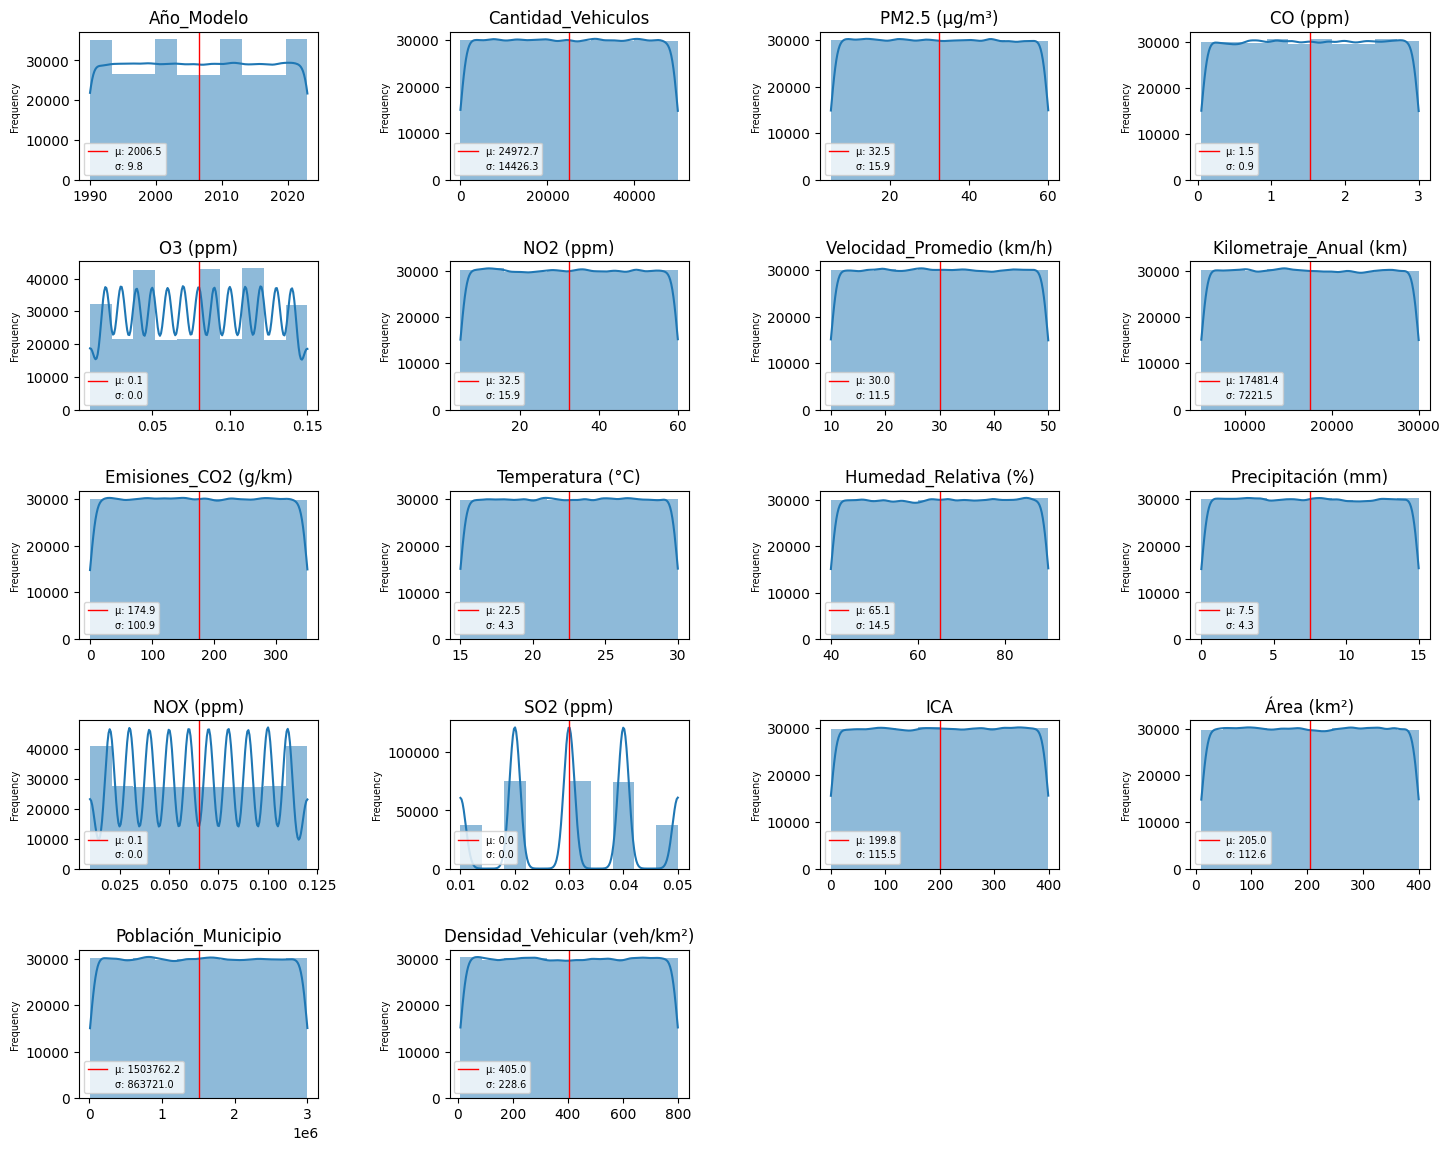

In [10]:
# Visualizar la distibucion de los datos de las variables numericas
columns = var_num_df_datos.select_dtypes(include=np.number).columns.tolist() # Select only numeric columns

# Calculate the required number of rows and columns for subplots
num_cols = 4  # Fixed number of columns
num_rows = int(np.ceil(len(columns) / num_cols))  # Calculate rows based on columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, variable in enumerate(columns):
  # Use the flattened axes array for plotting
  sns.histplot(var_num_df_datos[variable], bins=10, edgecolor=None, kde=True, ax=axes[i])

  mean_value = var_num_df_datos[variable].mean()
  std_dev = var_num_df_datos[variable].std()

  axes[i].axvline(mean_value, color='red', linewidth=1, label=f'μ: {mean_value:.1f}')
  axes[i].axvline(mean_value + std_dev, color='yellow', alpha=0.0, linewidth=1, label=f'σ: {std_dev:.1f}')

  axes[i].set_xlabel('')
  axes[i].set_ylabel('Frequency', fontsize=7)
  axes[i].set_title(variable)
  axes[i].legend(loc=3, fontsize=7)


plt.tight_layout(pad=2.5)

# Turn off any extra subplots if needed
num_subplots = num_rows * num_cols
for i in range(len(columns), num_subplots):
  axes[i].axis('off')

In [ ]:
# Visualizar la distibucion de los datos de las variables categoricas
columns = var_num_df_datos.drop('PM2.5 (µg/m³)', axis = 1).columns.tolist()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 12))
axes[1,2] = plt.subplot2grid((2,4), (1,2), colspan=2)

plt.subplots_adjust(wspace=0.5, hspace=0.1)

for i, col in enumerate(columns):
  cross_tab = pd.crosstab(index=var_num_df_datos[col], columns=var_num_df_datos['PM2.5 (µg/m³)'])
  cross_tab_prop = pd.crosstab(index=var_num_df_datos[col], columns=var_num_df_datos['PM2.5 (µg/m³)'], normalize='index')

  row = i // 4
  col = i % 4

  cross_tab_prop.plot(kind = 'bar', stacked = True, width=0.8, colormap='Blues', sharey = True, ax = axes[row, col])

  for p in axes[row, col].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes[row, col].annotate('{:.1f}%'.format(height*100), (x + width/2, y + height/2), ha='center', va='center', fontweight="bold")

  axes[row,col].legend(title = 'PM2.5 (µg/m³)', ncol = 4, title_fontsize = 9, fontsize=8, loc = 9)
  axes[row,col].set_xticklabels(axes[row,col].get_xticklabels(), rotation=0)
plt.tight_layout(pad=3.0)

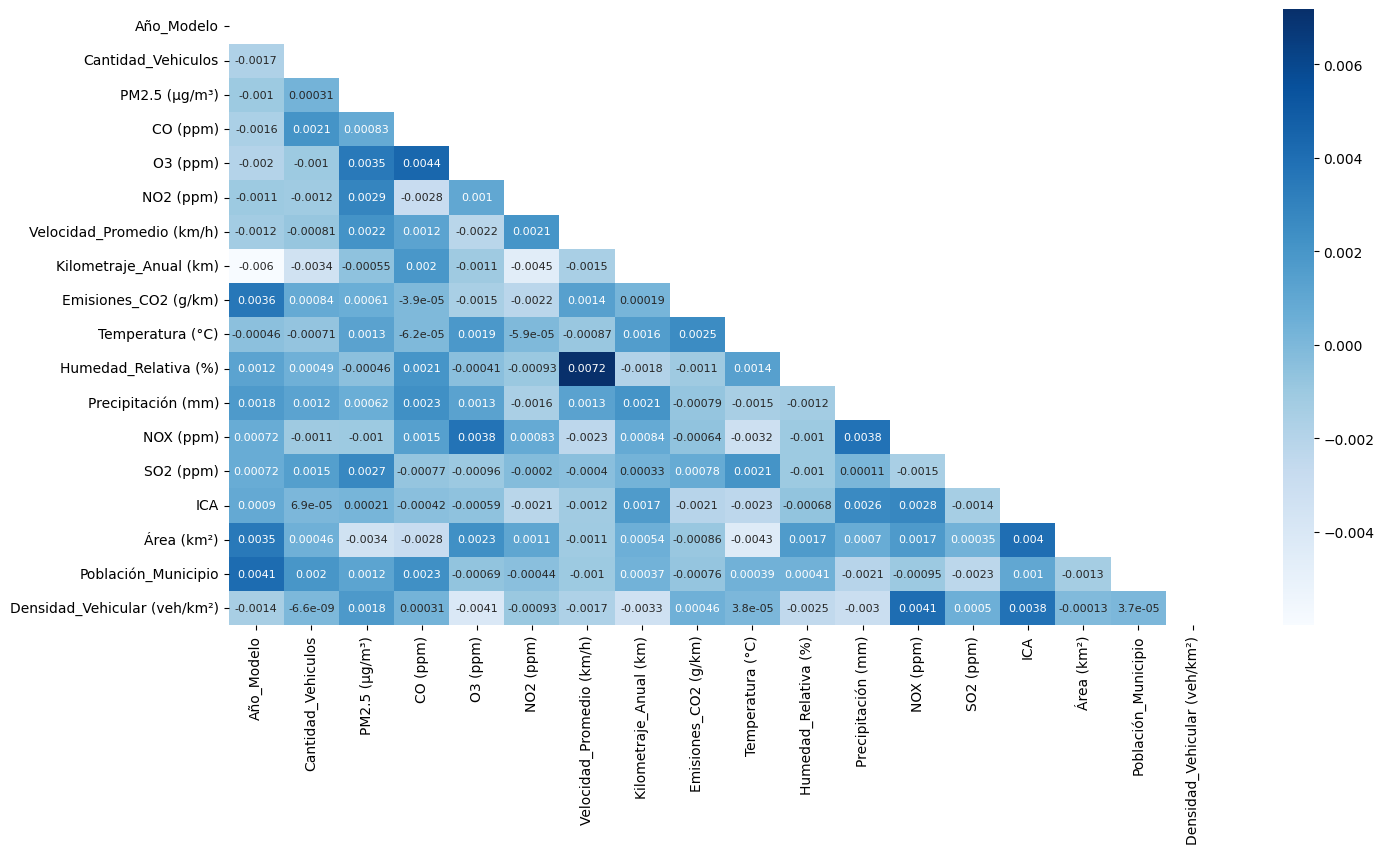

In [11]:
# Crear un heatmap para visualizar la correlacion entre variables del DataFrame df_datos
numeric_df = df_datos.select_dtypes(include=np.number)

matriz = numeric_df.corr(method='pearson')

mask = np.triu(np.ones_like(matriz, dtype=bool))

plt.figure(figsize=(16, 8))
ax = sns.heatmap(matriz,
                  annot = True,
                  cmap = 'Blues',
                  annot_kws={"fontsize":8},
                  mask = mask)

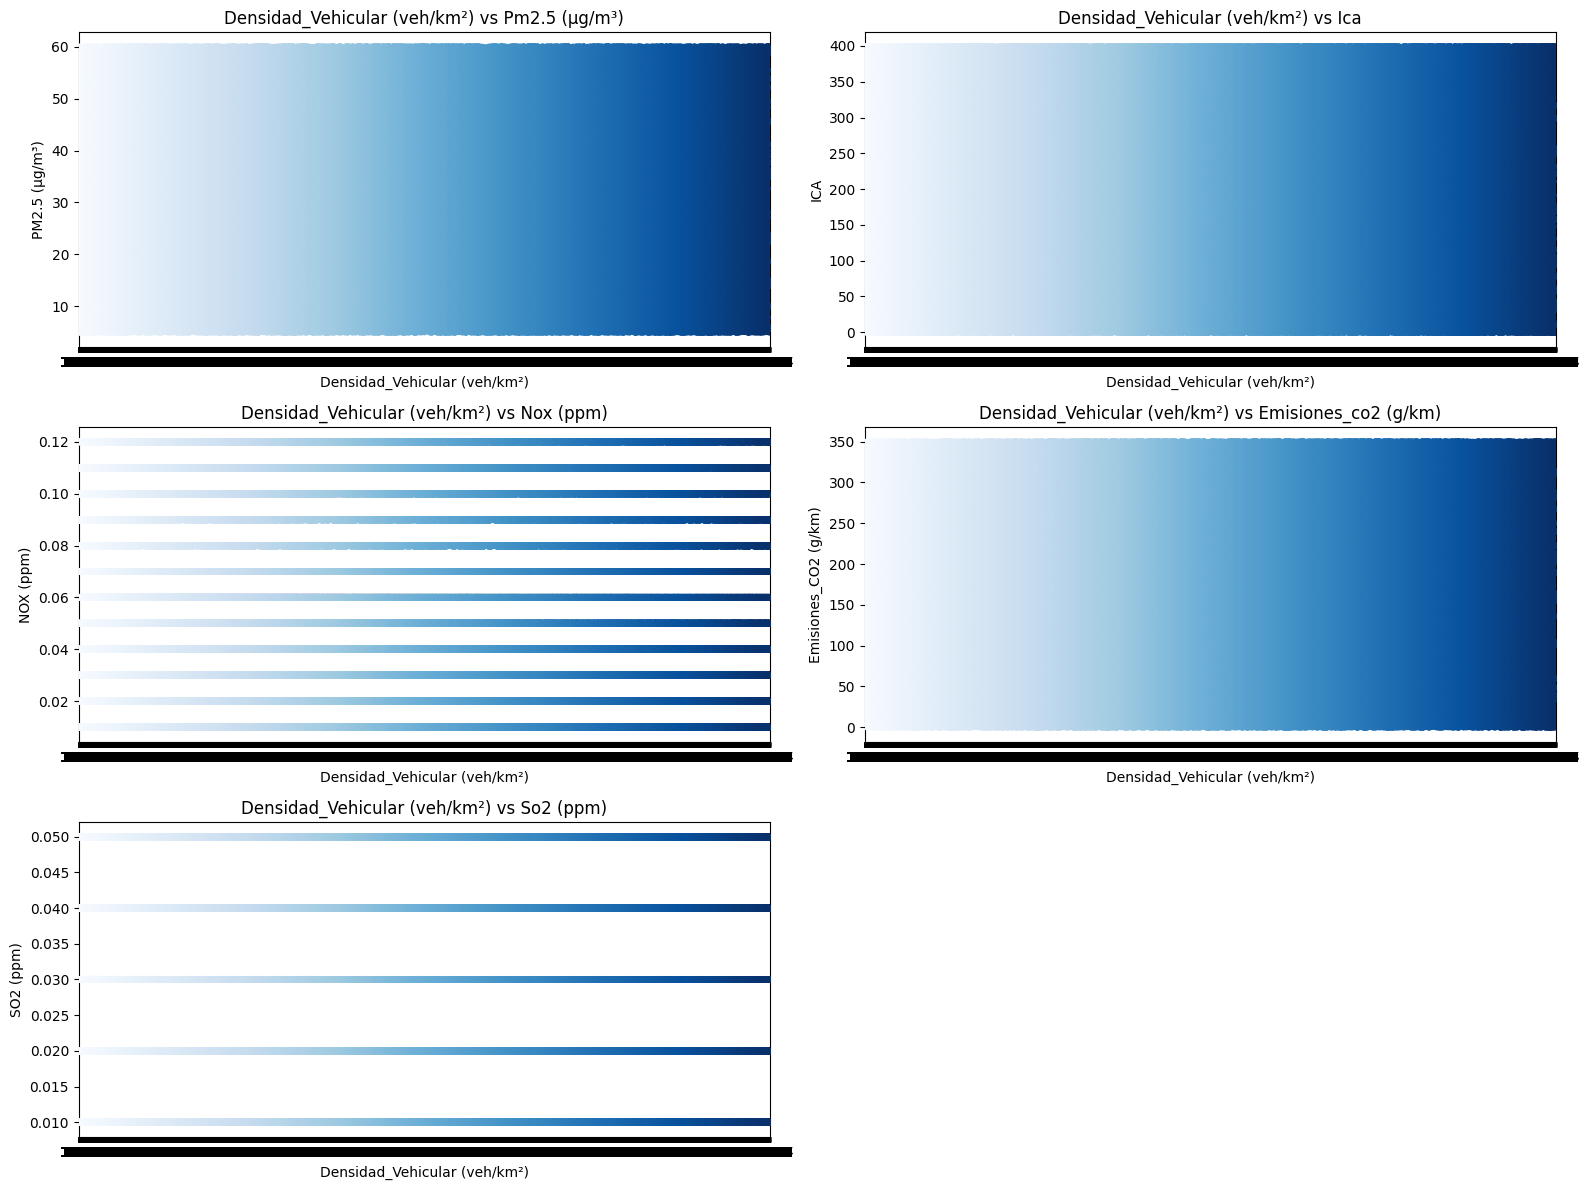

In [10]:
# Visualizar la distribucion de los datos de las variables con mayor correlación
variables = ['PM2.5 (µg/m³)', 'ICA', 'NOX (ppm)', 'Emisiones_CO2 (g/km)', 'SO2 (ppm)']
# Aumentar el número de filas para acomodar todas las variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
for i, variable in enumerate(variables):
    row = i // 2  # Calcular el índice de fila.
    col = i % 2   # Calcular el índice de la columna.

    # Plot el swarmplot
    sns.swarmplot(x='Densidad_Vehicular (veh/km²)', y=variable, data=df_datos, ax=axes[row, col], palette='Blues')
    axes[row, col].set_title(f'Densidad_Vehicular (veh/km²) vs {variable.capitalize()}')

# Oculte las subtramas no utilizadas si es necesario
if len(variables) < axes.size:
    for i in range(len(variables), axes.size):
        row = i // axes.shape[1]
        col = i % axes.shape[1]
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# 6. Definir Datos de Entrenamiento y Prueba

In [37]:
# Definir datos de entrenamiento y prueba
count_pm = df_datos.groupby('ICA').agg({'ICA':'count'})
count_pm['% Frequency'] = (count_pm['ICA']/count_pm['ICA'].sum()) *100
count_pm = count_pm.rename(columns = {'ICA':'Frequency'})

In [38]:
# Definir features y target
features = ['NOX (ppm)', 'SO2 (ppm)'] 
target = 'ICA'

# Create feature and target DataFrames
X = df_datos[features]
y = df_datos[target]

In [39]:
# Dividir los datos de entrenamiento y prueba en la misma proporcion en ralacion a price_range
# Definir la distribucion de los datos
stratified = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 11)

for index_train, index_test in stratified.split(df_datos, df_datos[target]):
    set_train = df_datos.loc[index_train]
    set_test = df_datos.loc[index_test]

In [40]:
# Comprobar la distribucion de los datos
data_distribution = pd.DataFrame({
  'set_train':set_train[target].value_counts()/df_datos[target].value_counts(),
  'set_test':set_test[target].value_counts()/df_datos[target].value_counts()
})

data_distribution

,set_train,set_test
ICA,,
0,0.800256,0.199744
1,0.800587,0.199413
2,0.800248,0.199752
3,0.800522,0.199478
4,0.799735,0.200265
...,...,...
395,0.800528,0.199472
396,0.800000,0.200000
397,0.800000,0.200000


# 7. Transformación de Datos

## 7.1 Transformar Set de Entrenamiento

In [41]:
# Transformar set de entrenamiento
set_train_feature = set_train[features]
set_train_target = set_train[target]

In [42]:
set_train_feature.head()

,NOX (ppm),SO2 (ppm)
102037,0.04,0.04
17736,0.11,0.04
211078,0.10,0.04
172492,0.08,0.03
41041,0.11,0.03


In [43]:
set_train_target.head()

102037    269
17736     164
211078    295
172492    148
41041      11
Name: ICA, dtype: int32

In [44]:
# Escalar los datos del set de entrenamiento
scaler = StandardScaler()
set_train_feature_scaler = scaler.fit_transform(set_train_feature)
set_train_feature = pd.DataFrame(set_train_feature_scaler, columns = set_train_feature.columns)
set_train_feature.head()

,NOX (ppm),SO2 (ppm)
0,-0.780310,0.815236
1,1.406712,0.815236
2,1.094280,0.815236
3,0.469417,-0.000945
4,1.406712,-0.000945


## 7.2 Transformar Set de Prueba

In [45]:
# Transformar set de prueba
set_test_feature = set_test[features]
set_test_target = set_test[target]

In [46]:
set_test_feature.head()

,NOX (ppm),SO2 (ppm)
108424,0.03,0.03
182242,0.04,0.04
64320,0.11,0.03
253877,0.03,0.03
8632,0.05,0.04


In [47]:
set_test_target.head()

108424    372
182242    313
64320     123
253877    106
8632       91
Name: ICA, dtype: int32

In [48]:
# Escalar los datos del set de prueba
set_test_feature_scaler = scaler.transform(set_test_feature)
set_test_feature = pd.DataFrame(set_test_feature_scaler, columns = set_test_feature.columns)
set_test_feature.head()

,NOX (ppm),SO2 (ppm)
0,-1.092742,-0.000945
1,-0.780310,0.815236
2,1.406712,-0.000945
3,-1.092742,-0.000945
4,-0.467878,0.815236


# 8. Entrenamiento de Modelos

## 8.1 Modelo XGBClassifier

In [ ]:
# Escoger las columnas más relevantes con RFECV
le = LabelEncoder()

set_train_target_encoded = le.fit_transform(set_train_target)

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    tree_method='hist',
    early_stopping_rounds=10
)

selector_xgb = RFECV(xgb,
                step = 1,
                cv = 5,
                scoring = 'accuracy')

selector_xgb.fit(set_train_feature, set_train_target_encoded)

relevant_feature_xgb = set_train_feature.columns[selector_xgb.support_].tolist()

print(f'Numero de caracteristicas seleccionadas: {selector_xgb.n_features_}')
print(f'Caracteristicas seleccionadas: {relevant_feature_xgb}')

In [ ]:
# Seleccionar los mejores hiperparametros
xgb = XGBClassifier()

param_grid_xgb = {
    'learning_rate':[0.1, 0.5, 0.8],
    'n_estimators':[50, 100, 200, 300]
}

grid_search_xgb = GridSearchCV(estimator = xgb,
                                param_grid = param_grid_xgb,
                                cv = 5,
                                scoring = 'accuracy')

grid_search_xgb.fit(set_train_feature[relevant_feature_xgb], set_train_target)

print(f'Mejores hiperparametros: {grid_search_xgb.best_params_}')

In [ ]:
#Predecir datos con los set de entrenamiento y prueba
#Prediccion con set de entrenamiento
target_pred_xgb_train = grid_search_xgb.predict(set_train_feature[relevant_feature_xgb])

#Prediccion con set de prueba
target_pred_xgb_test = grid_search_xgb.predict(set_test_feature[relevant_feature_xgb])

In [ ]:
#Obtener los score de clasificacion para los set de entrenamiento y prueba
#Score de clasificacion con set de entrenamiento
df_result_xgb_train = pd.DataFrame(data = [
    accuracy_score(set_train_target, target_pred_xgb_train),
    precision_score(set_train_target, target_pred_xgb_train, average = 'macro'),
    recall_score(set_train_target, target_pred_xgb_train, average = 'macro'),
    f1_score(set_train_target, target_pred_xgb_train, average = 'macro')],
    index = ['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
    columns = ['XGBClassifier']
)

#Score de clasificacion con set de prueba
df_result_xgb_test = pd.DataFrame(data = [
    accuracy_score(set_test_target, target_pred_xgb_test),
    precision_score(set_test_target, target_pred_xgb_test, average = 'macro'),
    recall_score(set_test_target, target_pred_xgb_test, average = 'macro'),
    f1_score(set_test_target, target_pred_xgb_test, average = 'macro')],
    index = ['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
    columns = ['XGBClassifier']
)

In [ ]:
print(f'\033[1mClassification Report XGBClassifier set train\n\n\033[0m{classification_report(set_train_target, target_pred_xgb_train)}\n\n')
print(f'\033[1mClasiffication Report XGBClassifier set test\n\n\033[0m{classification_report(set_test_target, target_pred_xgb_test)}')

In [ ]:
#Visualizar matriz de coeficiente para los set de entrenamiento y prueba
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

#Matriz de coeficiente con set de entrenamiento
conf_matrix_xgb_train = confusion_matrix(set_train_target, target_pred_xgb_train)

sns.heatmap(conf_matrix_xgb_train, annot=True, cmap='Blues', fmt='g', ax = axes[0])
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Real Values')
axes[0].set_title('Confusion Matrix XGBClassifier set train')

#Matriz de coeficiente con set de entrenamiento
conf_matrix_xgb_test = confusion_matrix(set_test_target, target_pred_xgb_test)

sns.heatmap(conf_matrix_xgb_test, annot=True, cmap='Blues', fmt='g', ax = axes[1])
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Real Values')
axes[1].set_title('Confusion Matrix XGBClassifier set test');

## 8.2 Modelo RandomForestClassifier

In [49]:
# Escoger las columnas más relevantes con RFECV
le = LabelEncoder()

set_train_target_encoded = le.fit_transform(set_train_target)

rfc = RandomForestClassifier(random_state = 11)

selector_rfc = RFECV(rfc,
    step = 1,
    cv = 5,
    scoring = 'accuracy')

selector_rfc.fit(set_train_feature, set_train_target_encoded)

relevant_feature_rfc = set_train_feature.columns[selector_rfc.support_].tolist()

print(f'Numero de caracteristicas seleccionadas: {selector_rfc.n_features_}')
print(f'Caracteristicas seleccionadas: {relevant_feature_rfc}')

Numero de caracteristicas seleccionadas: 2
Caracteristicas seleccionadas: ['NOX (ppm)', 'SO2 (ppm)']


In [51]:
# Seleccionar los mejores hiperparametros
rfc = RandomForestClassifier(random_state = 11)

param_grid_rfc = {
  'max_depth':[2, 4],
  'max_leaf_nodes':[5, 10],
  'n_estimators':[50, 100]
}

grid_search_rfc = GridSearchCV(estimator = rfc,
                                param_grid = param_grid_rfc,
                                cv = 5,
                                scoring = 'accuracy')

grid_search_rfc.fit(set_train_feature[relevant_feature_rfc], set_train_target)

print(f'Mejores hiperparametros: {grid_search_rfc.best_params_}')

Mejores hiperparametros: {'max_depth': 4, 'max_leaf_nodes': 10, 'n_estimators': 50}


In [52]:
#Predecir datos con los set de entrenamiento y prueba
#Prediccion con set de entrenamiento
target_pred_rfc_train = grid_search_rfc.predict(set_train_feature[relevant_feature_rfc])

#Prediccion con set de prueba
target_pred_rfc_test = grid_search_rfc.predict(set_test_feature[relevant_feature_rfc])

In [53]:
#Obtener los score de clasificacion para los set de entrenamiento y prueba
#Score de clasificacion con set de entrenamiento
df_result_rfc_train = pd.DataFrame(data = [
  accuracy_score(set_train_target, target_pred_rfc_train),
  precision_score(set_train_target, target_pred_rfc_train, average = 'macro'),
  recall_score(set_train_target, target_pred_rfc_train, average = 'macro'),
  f1_score(set_train_target, target_pred_rfc_train, average = 'macro')],
  index = ['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
  columns = ['RandonForestClassifier']
)

#Score de clasificacion con set de prueba
df_result_rfc_test = pd.DataFrame(data = [
  accuracy_score(set_test_target, target_pred_rfc_test),
  precision_score(set_test_target, target_pred_rfc_test, average = 'macro'),
  recall_score(set_test_target, target_pred_rfc_test, average = 'macro'),
  f1_score(set_test_target, target_pred_rfc_test, average = 'macro')],
  index = ['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
  columns = ['RandonForestClassifier']
)

In [54]:
print(f'\033[1mClassification Report RandorForestClassifier set train\n\n\033[0m{classification_report(set_train_target, target_pred_rfc_train)}\n\n')
print(f'\033[1mClassificacion Report RandorForestClassifier set test\n\n\033[0m{classification_report(set_test_target, target_pred_rfc_test)}')

Classification Report RandorForestClassifier set train

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       625
           1       0.00      0.00      0.00       546
           2       0.00      0.02      0.00       645
           3       0.00      0.00      0.00       614
           4       0.00      0.00      0.00       603
           5       0.00      0.00      0.00       576
           6       0.00      0.00      0.00       633
           7       0.00      0.00      0.00       570
           8       0.00      0.00      0.00       568
           9       0.00      0.00      0.00       628
          10       0.00      0.00      0.00       584
          11       0.00      0.00      0.00       564
          12       0.00      0.00      0.00       614
          13       0.00      0.00      0.00       632
          14       0.00      0.00      0.00       591
          15       0.00      0.00      0.00       577
          16       0.00  

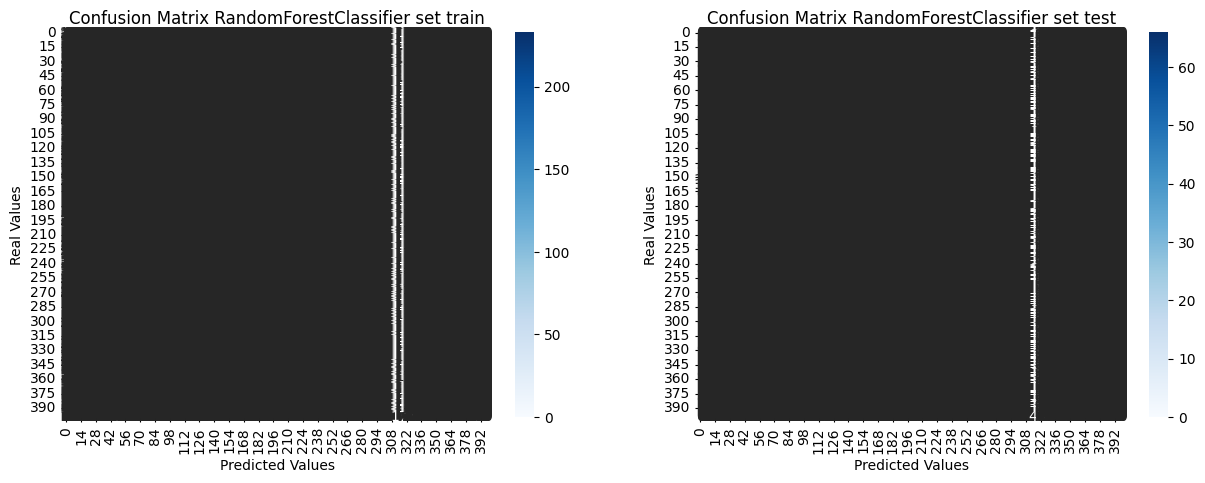

In [55]:
#Visualizar matriz de coeficiente para los set de entrenamiento y prueba
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

#Matriz de coeficiente con set de entrenamiento
conf_matrix_rfc_train = confusion_matrix(set_train_target, target_pred_rfc_train)

sns.heatmap(conf_matrix_rfc_train, annot=True, cmap='Blues', fmt='g', ax = axes[0])
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Real Values')
axes[0].set_title('Confusion Matrix RandomForestClassifier set train')

#Matriz de coeficiente con set de entrenamiento
conf_matrix_rfc_test = confusion_matrix(set_test_target, target_pred_rfc_test)

sns.heatmap(conf_matrix_rfc_test, annot=True, cmap='Blues', fmt='g', ax = axes[1])
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Real Values')
axes[1].set_title('Confusion Matrix RandomForestClassifier set test');

## 8.3 Modelo SVC

In [ ]:
# Seleccionar los mejores hiperparametros
svc = SVC(random_state = 11)

param_grid_svc = [
  {'kernel':['poly'],
  'degree':[2, 3],
  'gamma':[0.01, 0.1, 1],
  'C':[0.1, 1, 10]},
  {'kernel':['rbf', 'sigmoid'],
  'gamma': [0.01, 0.1, 1],
  'C':[0.1, 1, 10]},
  {'kernel': ['linear'],
  'C':[0.1, 1, 10, 30, 50]}
]

grid_search_svc = GridSearchCV(estimator = svc,
                                param_grid = param_grid_svc,
                                cv = 5,
                                scoring = 'accuracy')

grid_search_svc.fit(set_train_feature, set_train_target)

print(f'Mejores hiperparametros: {grid_search_svc.best_params_}')

In [ ]:
#Predecir datos con los set de entrenamiento y prueba
#Prediccion con set de entrenamiento
target_pred_svc_train = grid_search_svc.predict(set_train_feature)

#Prediccion con set de prueba
target_pred_svc_test = grid_search_svc.predict(set_test_feature)

In [ ]:
#Obtener los score de clasificacion para los set de entrenamiento y prueba
#Score de clasificacion con set de entrenamiento
df_result_svc_train = pd.DataFrame(data = [
    accuracy_score(set_train_target, target_pred_svc_train),
    precision_score(set_train_target, target_pred_svc_train, average = 'macro'),
    recall_score(set_train_target, target_pred_svc_train, average = 'macro'),
    f1_score(set_train_target, target_pred_svc_train, average = 'macro')],
    index = ['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
    columns = ['SVC']
)

#Score de clasificacion con set de prueba
df_result_svc_test = pd.DataFrame(data = [
    accuracy_score(set_test_target, target_pred_svc_test),
    precision_score(set_test_target, target_pred_svc_test, average = 'macro'),
    recall_score(set_test_target, target_pred_svc_test, average = 'macro'),
    f1_score(set_test_target, target_pred_svc_test, average = 'macro')],
    index = ['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
    columns = ['SVC']
)

In [ ]:
print(f'\033[1mClassification Report SVC set train\n\n\033[0m{classification_report(set_train_target, target_pred_svc_train)}\n\n')
print(f'\033[1mClassificacion Report SVC set test\n\n\033[0m{classification_report(set_test_target, target_pred_svc_test)}')

In [ ]:
#Visualizar matriz de coeficiente para los set de entrenamiento y prueba
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

#Matriz de coeficiente con set de entrenamiento
conf_matrix_svc_train = confusion_matrix(set_train_target, target_pred_svc_train)

sns.heatmap(conf_matrix_svc_train, annot=True, cmap='Blues', fmt='g', ax = axes[0])
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Real Values')
axes[0].set_title('Confusion Matrix SCV set train')

#Matriz de coeficiente con set de entrenamiento
conf_matrix_svc_test = confusion_matrix(set_test_target, target_pred_svc_test)

sns.heatmap(conf_matrix_svc_test, annot=True, cmap='Blues', fmt='g', ax = axes[1])
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Real Values')
axes[1].set_title('Confusion Matrix SVC set test');

## 8.4 Modelo KNN

In [ ]:
# Seleccionar los mejores hiperparametros
knn = KNeighborsClassifier()

param_grid_knn = {
  'n_neighbors': [3, 5, 7, 9],
  'weights': ['uniform', 'distance'],
  'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator = knn,
                                param_grid = param_grid_knn,
                                cv = 5,
                                scoring = 'accuracy')

grid_search_knn.fit(set_train_feature, set_train_target)

print(f'Mejores hiperparametros: {grid_search_knn.best_params_}')

In [ ]:
#Predecir datos con los set de entrenamiento y prueba
#Prediccion con set de entrenamiento
target_pred_knn_train = grid_search_knn.predict(set_train_feature)

#Prediccion con set de prueba
target_pred_knn_test = grid_search_knn.predict(set_test_feature)

In [ ]:
#Obtener los score de clasificacion para los set de entrenamiento y prueba
#Score de clasificacion con set de entrenamiento
df_result_knn_train = pd.DataFrame(data = [
    accuracy_score(set_train_target, target_pred_knn_train),
    precision_score(set_train_target, target_pred_knn_train, average = 'macro'),
    recall_score(set_train_target, target_pred_knn_train, average = 'macro'),
    f1_score(set_train_target, target_pred_knn_train, average = 'macro')],
    index = ['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
    columns = ['KNN']
)

#Score de clasificacion con set de prueba
df_result_knn_test = pd.DataFrame(data = [
    accuracy_score(set_test_target, target_pred_knn_test),
    precision_score(set_test_target, target_pred_knn_test, average = 'macro'),
    recall_score(set_test_target, target_pred_knn_test, average = 'macro'),
    f1_score(set_test_target, target_pred_knn_test, average = 'macro')],
    index = ['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
    columns = ['KNN']
)

In [ ]:
print(f'\033[1mClassification Report KNN set train\n\n\033[0m{classification_report(set_train_target, target_pred_knn_train)}\n\n')
print(f'\033[1mClassificacion Report KNN set test\n\n\033[0m{classification_report(set_test_target, target_pred_knn_test)}')

In [ ]:
#Visualizar matriz de coeficiente para los set de entrenamiento y prueba
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

#Matriz de coeficiente con set de entrenamiento
conf_matrix_knn_train = confusion_matrix(set_train_target, target_pred_knn_train)

sns.heatmap(conf_matrix_knn_train, annot=True, cmap='Blues', fmt='g', ax = axes[0])
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Real Values')
axes[0].set_title('Confusion Matrix KNN set train')

#Matriz de coeficiente con set de entrenamiento
conf_matrix_knn_test = confusion_matrix(set_test_target, target_pred_knn_test)

sns.heatmap(conf_matrix_knn_test, annot=True, cmap='Blues', fmt='g', ax = axes[1])
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Real Values')
axes[1].set_title('Confusion Matrix KNN set test');

# 9. Metricas de Evaluación de Modelos

In [ ]:
# Concatenar las metricas de clasificacion de los modelos, entrenados con set de entrenamiento
# Función para convertir números a formato de porcentaje
def format_percentage(num):
  return f'{num * 100:.2f}%'

print('\033[1mScore Result set train\n\n\033[0m')
result_scoring_train = pd.concat([df_result_xgb_train, df_result_rfc_train, df_result_svc_train, df_result_knn_train], axis = 1).T
result_scoring_train = result_scoring_train.sort_values(by = 'Accuracy', ascending = False)
result_scoring_train.applymap(format_percentage)

In [ ]:
# Concatenar las metricas de clasificacion de los modelos, entrenados con set de entrenamiento
print('\033[1mScore Result set test\n\n\033[0m')
result_scoring_test = pd.concat([df_result_xgb_test, df_result_rfc_test, df_result_svc_test, df_result_knn_test], axis = 1).T
result_scoring_test = result_scoring_test.sort_values(by = 'Accuracy', ascending = False)
result_scoring_test.applymap(format_percentage)

# 10. Evaluación de Modelos con Validación Cruzada

## 10.1 Evaluación Cruzada Modelo XGBClassifier

In [ ]:
# Precision promedio y desviacion estandar del modelo
cross_val_result_xgb = cross_val_score(grid_search_xgb,
                                  set_train_feature[relevant_feature_xgb],
                                  set_train_target,
                                  cv = 5,
                                  scoring = 'accuracy')

print(f'Precision promedio del modelo: {cross_val_result_xgb.mean()}')
print(f'Desviación estandar de la precision del modelo: {cross_val_result_xgb.std( )}')

In [ ]:
# Prediccion con set de entrenamiento
cross_target_pred_xgb_train = cross_val_predict(grid_search_xgb,
                              set_train_feature[relevant_feature_xgb],
                              set_train_target,
                              cv = 5)

In [ ]:
# Score de clasificacion con set de entrenamiento
cross_df_result_xgb_train = pd.DataFrame(data = [
    accuracy_score(set_train_target, cross_target_pred_xgb_train),
    precision_score(set_train_target, cross_target_pred_xgb_train, average = 'macro'),
    recall_score(set_train_target, cross_target_pred_xgb_train, average = 'macro'),
    f1_score(set_train_target, cross_target_pred_xgb_train, average = 'macro')],
    index = ['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
    columns = ['XGBClassifier']
)

In [ ]:
print(f'\033[1mClassification Report XGBClassifier set train\n\n\033[0m{classification_report(set_train_target, cross_target_pred_xgb_train)}')

In [ ]:
#Visualizar matriz de coeficiente para el set de entrenamiento
plt.figure(figsize = (7,5))

cross_conf_matrix_xgb_train = confusion_matrix(set_train_target, cross_target_pred_xgb_train)

sns.heatmap(cross_conf_matrix_xgb_train, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.title('Confusion Matrix XGBClassifier set train');

## 10.2 Evaluación Cruzada Modelo RandomForestClassifier

In [ ]:
# Precision promedio y desviacion estandar del modelo
cross_val_result_rfc = cross_val_score(grid_search_rfc,
                                set_train_feature[relevant_feature_rfc],
                                set_train_target,
                                cv = 5,
                                scoring = 'accuracy')

print(f'Precision promedio del modelo: {cross_val_result_rfc.mean()}')
print(f'Desviación estandar de la precision del modelo: {cross_val_result_rfc.std()}')

In [ ]:
# Prediccion con set de entrenamiento
cross_target_pred_rfc_train = cross_val_predict(grid_search_rfc,
                              set_train_feature[relevant_feature_rfc],
                              set_train_target,
                              cv = 5)

In [ ]:
# Score de clasificacion con set de entrenamiento
cross_df_result_rfc_train = pd.DataFrame(data = [
    accuracy_score(set_train_target, cross_target_pred_rfc_train),
    precision_score(set_train_target, cross_target_pred_rfc_train, average = 'macro'),
    recall_score(set_train_target, cross_target_pred_rfc_train, average = 'macro'),
    f1_score(set_train_target, cross_target_pred_rfc_train, average = 'macro')],
    index = ['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
    columns = ['RandonForestClassifier']
)

In [ ]:
print(f'\033[1mClassification Report RandorForestClassifier set train\n\n\033[0m{classification_report(set_train_target, cross_target_pred_rfc_train)}')

In [ ]:
#Visualizar matriz de coeficiente para el set de entrenamiento
plt.figure(figsize = (7,5))

cross_conf_matrix_rfc_train = confusion_matrix(set_train_target, cross_target_pred_rfc_train)

sns.heatmap(cross_conf_matrix_rfc_train, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.title('Confusion Matrix RandomForestClassifier set train');

## 10.3 Evaluación Cruzada Modelo SVC

In [ ]:
# Modelo con los mejores hiperparametros
best_params = grid_search_svc.best_params_
grid_search_svc = SVC(random_state = 11, **best_params)
grid_search_svc.fit(set_train_feature, set_train_target)

In [ ]:
# Precision promedio y desviacion estandar del modelo
cross_val_result_svc = cross_val_score(grid_search_svc,
                                  set_train_feature,
                                  set_train_target,
                                  cv = 5,
                                  scoring = 'accuracy')

print(f'Precision promedio del modelo: {cross_val_result_svc.mean()}')
print(f'Desviación estandar de la precision del modelo: {cross_val_result_svc.std()}')

In [ ]:
# Prediccion con set de entrenamiento
cross_target_pred_svc_train = cross_val_predict(grid_search_svc,
                              set_train_feature,
                              set_train_target,
                              cv = 5)

In [ ]:
# Score de clasificacion con set de entrenamiento
cross_df_result_svc_train = pd.DataFrame(data = [
    accuracy_score(set_train_target, cross_target_pred_svc_train),
    precision_score(set_train_target, cross_target_pred_svc_train, average = 'macro'),
    recall_score(set_train_target, cross_target_pred_svc_train, average = 'macro'),
    f1_score(set_train_target, cross_target_pred_svc_train, average = 'macro')],
    index = ['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
    columns = ['SVC']
)

In [ ]:
print(f'\033[1mClassification Report SVC set train\n\n\033[0m{classification_report(set_train_target, cross_target_pred_svc_train)}')

In [ ]:
#Visualizar matriz de coeficiente para el set de entrenamiento
plt.figure(figsize = (7,5))

cross_conf_matrix_svc_train = confusion_matrix(set_train_target, cross_target_pred_svc_train)

sns.heatmap(cross_conf_matrix_svc_train, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.title('Confusion Matrix SCV set train');

## 10.4 Evaluación Cruzada Modelo KNN

In [ ]:
# Precision promedio y desviacion estandar del modelo
cross_val_result_knn = cross_val_score(grid_search_knn,
                                  set_train_feature,
                                  set_train_target,
                                  cv = 5,
                                  scoring = 'accuracy')

print(f'Precision promedio del modelo: {cross_val_result_knn.mean()}')
print(f'Desviación estandar de la precision del modelo: {cross_val_result_knn.std()}')

In [ ]:
# Prediccion con set de entrenamiento
cross_target_pred_knn_train = cross_val_predict(grid_search_knn,
                              set_train_feature,
                              set_train_target,
                              cv = 5)

In [ ]:
# Score de clasificacion con set de entrenamiento
cross_df_result_knn_train = pd.DataFrame(data = [
    accuracy_score(set_train_target, cross_target_pred_knn_train),
    precision_score(set_train_target, cross_target_pred_knn_train, average = 'macro'),
    recall_score(set_train_target, cross_target_pred_knn_train, average = 'macro'),
    f1_score(set_train_target, cross_target_pred_knn_train, average = 'macro')],
    index = ['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
    columns = ['KNN']
)

In [ ]:
print(f'\033[1mClassification Report KNN set train\n\n\033[0m{classification_report(set_train_target, cross_target_pred_knn_train)}')

In [ ]:
#Visualizar matriz de coeficiente para el set de entrenamiento
plt.figure(figsize = (7,5))

cross_conf_matrix_knn_train = confusion_matrix(set_train_target, cross_target_pred_knn_train)

sns.heatmap(cross_conf_matrix_knn_train, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.title('Confusion Matrix KNN set train');

# 11. Metricas de Evaluación de Modelos con Validación Cruzada

In [ ]:
# Concatenar las metricas de clasificacion de los modelos, entrenados con set de entrenamiento
cross_result_scoring_train = pd.concat([cross_df_result_xgb_train, cross_df_result_rfc_train, cross_df_result_svc_train, cross_df_result_knn_train], axis = 1).T
cross_result_scoring_train = cross_result_scoring_train.sort_values(by = 'Accuracy', ascending = False)
cross_result_scoring_train.applymap(format_percentage)

# 12. Predicciones con Mejor Modelo

In [ ]:
# Escalar set de datos
df_datos_scaler = scaler.transform(df_datos)
df_datos = pd.DataFrame(df_datos_scaler, columns = df_datos.columns)
df_datos.head()

In [ ]:
# Hacer predicciones de clases
target_pred = grid_search_svc.predict(df_datos)

# Revertir la transformacion escalar de los datos
df_datos_original = pd.DataFrame(scaler.inverse_transform(df_datos), columns=df_datos.columns)

# Unir el DataFrame con las predicciones hechas
df_datos_original['PM2.5 (µg/m³)_pred'] = target_pred
df_datos_original.head()

In [ ]:
# Visualizar la frecuencia de las clases predichas
pred_count = df_datos_original['PM2.5 (µg/m³)_pred'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x = pred_count.index, y = pred_count.values, palette = 'Blues')

for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.0f}'.format(height), (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize = 11)

plt.title('Frequency Predicted Classes')
plt.xlabel('Price Range')
plt.ylabel('Frequency');

# 13. Conclusiones